In [59]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

In [60]:
data = yf.download(tickers = 'BTC-USD')[['Close']]
data.index = pd.DatetimeIndex(data.index.values, freq = data.index.inferred_freq)

[*********************100%***********************]  1 of 1 completed


In [61]:
data.head()

,Close
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


# Plot data to see trends

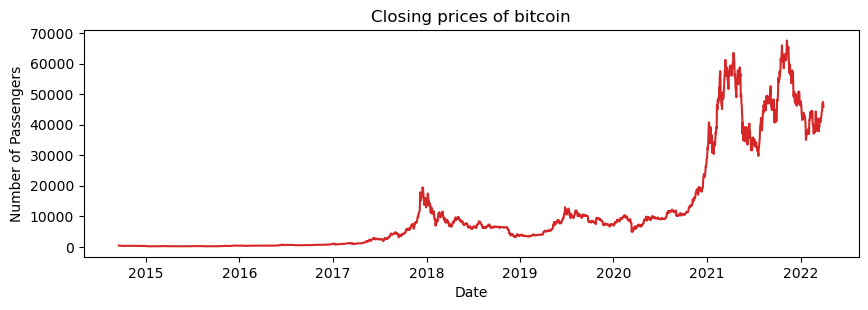

In [62]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(10,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.index, y=data.Close, title='Closing prices of bitcoin')    

# Test for stationarity

In [63]:
from statsmodels.tsa.stattools import adfuller, kpss

In [64]:
result=adfuller(data['Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.8719173565069412
p-value: 0.7970797295461336
Critial Values:
   1%, -3.432752890222607
Critial Values:
   5%, -2.862601622513937
Critial Values:
   10%, -2.5673351362717


In [65]:
result = kpss(data, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 5.936345
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# Transform non-stationary series into stationary

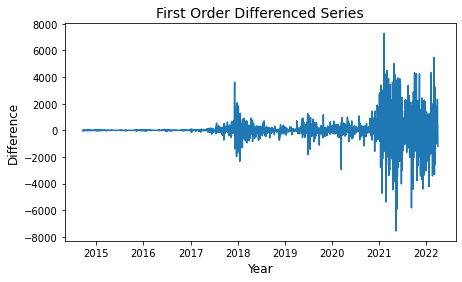

In [66]:
data1=data.copy()
data1["Close"] = data1['Close'].diff()
data1.dropna(inplace = True)

plt.figure(figsize=(7,4))
plt.plot(data1)
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [67]:
data1

,Close
2014-09-18,-32.894012
2014-09-19,-29.644012
2014-09-20,14.108002
2014-09-21,-10.082977
2014-09-22,3.330994
...,...
2022-03-27,2319.664062
2022-03-28,307.511719
2022-03-29,337.726562
2022-03-30,-403.066406


In [68]:
result = adfuller(data1.dropna())
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

(-8.641491428940304, 5.4108057083424444e-14, 28, 2723, {'1%': -3.43275377349882, '5%': -2.8626020125974088, '10%': -2.567335343952557}, 44017.514627757664)
ADF Test Statistic: -8.64
5% Critical Value: -2.86
p-value: 0.00


In [69]:
result = kpss(data1)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.131945
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Test for autocorrelation

In [70]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


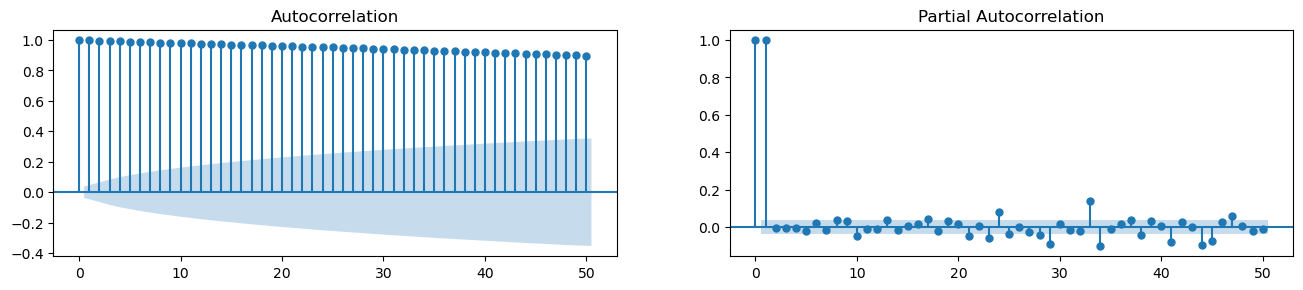

In [71]:
acf_50 = acf(data.Close, nlags=50)
pacf_50 = pacf(data.Close, nlags=50)

# Draw Plots
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(data.Close.tolist(), lags=50, ax=axes[1])

plt.show()

# MA model

In [72]:
from statsmodels.tsa.arima.model import ARIMA

In [73]:
ma1 = ARIMA(data1, order = (0,0,1))
results_ma1 = ma1.fit()
print(results_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2752
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -22264.715
Date:                Thu, 31 Mar 2022   AIC                          44535.431
Time:                        20:01:10   BIC                          44553.191
Sample:                    09-18-2014   HQIC                         44541.847
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5025     14.857      1.111      0.267     -12.616      45.621
ma.L1         -0.0228      0.010     -2.364      0.018      -0.042      -0.004
sigma2      6.243e+05   5264.109    118.589      0.0

In [74]:
ma2 = ARIMA(data1, order = (0,0,2))
results_ma2 = ma2.fit()
print(results_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2752
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -22264.706
Date:                Thu, 31 Mar 2022   AIC                          44537.412
Time:                        20:01:10   BIC                          44561.093
Sample:                    09-18-2014   HQIC                         44545.968
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5025     14.866      1.110      0.267     -12.634      45.639
ma.L1         -0.0227      0.010     -2.347      0.019      -0.042      -0.004
ma.L2         -0.0030      0.009     -0.336      0.7

# AR model

In [75]:
model_ar2 = ARIMA(data1, order = (2,0,0))
results_ar2 = model_ar2.fit()
print(results_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2752
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -22264.695
Date:                Thu, 31 Mar 2022   AIC                          44537.390
Time:                        20:01:10   BIC                          44561.071
Sample:                    09-18-2014   HQIC                         44545.945
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5025     14.826      1.113      0.266     -12.556      45.561
ar.L1         -0.0227      0.010     -2.358      0.018      -0.042      -0.004
ar.L2         -0.0042      0.009     -0.468      0.6

# ARMA model

In [76]:
model_arma22 = ARIMA(data1, order = (2,0,2))
results_arma22 = model_arma22.fit()
print(results_arma22.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2752
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -22263.593
Date:                Thu, 31 Mar 2022   AIC                          44539.187
Time:                        20:01:12   BIC                          44574.707
Sample:                    09-18-2014   HQIC                         44552.020
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5025     15.758      1.047      0.295     -14.382      47.387
ar.L1          1.0768      0.220      4.902      0.000       0.646       1.507
ar.L2         -0.3525      0.222     -1.590      0.1

# ARIMA model

In [77]:
model_arima212 = ARIMA(data, order = (2,1,2))
results_arima212 = model_arima212.fit()
print(results_arima212.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2753
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -22264.146
Date:                Thu, 31 Mar 2022   AIC                          44538.292
Time:                        20:01:13   BIC                          44567.892
Sample:                    09-17-2014   HQIC                         44548.986
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1598      0.219      5.301      0.000       0.731       1.589
ar.L2         -0.3514      0.215     -1.634      0.102      -0.773       0.070
ma.L1         -1.1854      0.216     -5.500      0.0

# Evaluate best model

In [78]:
models_name = ['MA1', 'MA2', 'AR2', 'ARMA','ARIMA']
results = [results_ma1,results_ma2,results_ar2,results_arma22,results_arima212]
from sklearn.metrics import mean_squared_error
rmse = []
for i in range(0, len(models_name)):
    if i != 4:
        r = mean_squared_error(y_true = data1, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
    else:
        r = mean_squared_error(y_true = data, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
        
rmse

[789.5293994673347,
 789.5255732335464,
 789.5238883356117,
 789.2056108598521,
 789.2687676760453]

In [79]:
aic = []
for i in range(0, len(models_name)):
    if i != 4:
        a = results[i].aic
        aic.append(a)
    else:
         a= results[i].aic
         aic.append(a) 
aic

[44535.4307477649,
 44537.412464316665,
 44537.39017448637,
 44539.186956449805,
 44538.29154056368]

In [80]:
results_rmse = list(zip(models_name,rmse))
summary = pd.DataFrame(results_rmse, columns=['models_name','rmse'])
summary['aic']=aic
summary

,models_name,rmse,aic
0,MA1,789.529399,44535.430748
1,MA2,789.525573,44537.412464
2,AR2,789.523888,44537.390174
3,ARMA,789.205611,44539.186956
4,ARIMA,789.268768,44538.291541


# Forecast

In [85]:
forecast = results_arima212.predict(start="2022-04-01", end="2022-08-30")

C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1264/1188961137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data.index
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1264/1188961137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Close']
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1264/1188961137.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

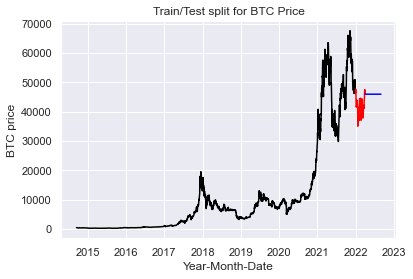

In [86]:
import seaborn as sns
data['Date'] = data.index
train = data[data['Date'] < pd.to_datetime("2021-12-31",format='%Y-%m-%d')]
train['train'] = train['Close']
del train['Date']
del train['Close']
test = data.loc[data['Date'] >= pd.to_datetime("2021-12-31", format='%Y-%m-%d')]
del test['Date']
test['test'] = test['Close']
del test['Close']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = 'blue')
plt.title("Train/Test split for BTC Price")
plt.ylabel("BTC price")
plt.xlabel("Year-Month-Date")
sns.set()
plt.show()